<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---


# TensorFlow

<p align="center"><img src="https://www.ambientelivre.com.br/images/logos_open_source/tensorflow_logo.png" width="80%"></p>

TensorFlow é uma plataforma open-source de machine learning, desenvolvida e mantida pelo Google (primariamente).

Trabalhando com uma estrutura conhecida como Tensores, permite tanto pesquisadores, engenheiros e analistas criarem suas arquiteturas de deep learning.

## Exemplo de aplicação do Tensorflow

***Fashion MNIST*** é um *dataset* considerado o *Hello, World!* de **Deep Learning** aplicado a problemas de **Visão Computacional**.

Contendo 60 mil imagens para treinamento e 10 mil para teste, é um *dataset* bem melhor que o antigo **MNIST** (que continha apenas digitos manuscritos).

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/fashion-mnist-sprite.png" height="400px"></p>

Ao total, as 70 mil imagens têm dimensões de 28 x 28 *pixels*, como mostra a imagem acima. Cada uma dessas imagens é classificada com um desses 10 *labels*:

<table>
  <tbody><tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table>

In [ ]:
# importar as bibliotecas necessárias
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# carregar os dados do Fashion MNIST
(X_train_orig, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# padronizar o dataset de treino e criar um de validação
X_valid, X_train = X_train_orig[:6000] / 255.0, X_train_orig[6000:] / 255.0
y_valid, y_train = y_train[:6000], y_train[6000:]

# De acordo com a documentação, os labels são:
class_names = ['Camisetas/top', 'Calça', 'Suéter',
               'Vestidos','Casaco', 'Sandálias',
               'Camisas', 'Tênis', 'Bolsa', 'Botas']

4423680/4422102 [==============================] - 0s 0us/step


Camisas


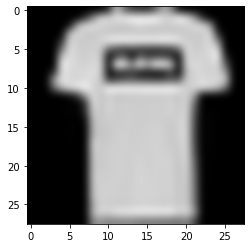

In [ ]:
# # ver exemplo de uma imagem aleatória
print(class_names[y_train[1]])
# plt.imshow(X_train_orig[1], cmap=plt.cm.binary);
# plt.imshow(X_train_orig[1], cmap='gray');
plt.imshow(X_train_orig[1], cmap='gray', interpolation="bicubic");

#### Criar, compilar e treinar um modelo

In [ ]:
# criar o modelo
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(784, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

# compilar o modelo
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# treinar o modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 1.1629 - accuracy: 0.6681 - val_loss: 0.7901 - val_accuracy: 0.7487
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7245 - accuracy: 0.7558 - val_loss: 0.6584 - val_accuracy: 0.7728
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6357 - accuracy: 0.7801 - val_loss: 0.6018 - val_accuracy: 0.7908
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5885 - accuracy: 0.7953 - val_loss: 0.5699 - val_accuracy: 0.8040
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.5576 - accuracy: 0.8061 - val_loss: 0.5443 - val_accuracy: 0.8138
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5359 - accuracy: 0.8128 - val_loss: 0.5212 - val_accuracy: 0.8205
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5188 - accuracy: 0.8189 - val_loss: 0.5047 - val_accuracy:

### Avaliar um modelo

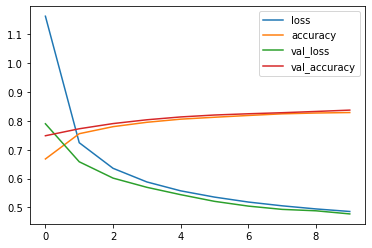

313/313 [==============================] - 1s 3ms/step - loss: 1.7955 - accuracy: 0.7232
[1.7954695224761963, 0.7232000231742859]


In [ ]:
# plotar o histórico da otimização
pd.DataFrame(history.history).plot()
plt.show()

# avaliar o modelo
print(model.evaluate(X_test, y_test))

## Modelos de Redes Neurais Convolucionais

In [ ]:
# criar modelo de CNN
model2 = keras.Sequential()

# definir a arquitetura da rede neural
model2.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model2.add(keras.layers.MaxPooling2D(pool_size=2))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=2))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(256, activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(10, activation='softmax'))

# Ver a aarquitetura do modelo 3
model2.summary()